# Shape changing

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

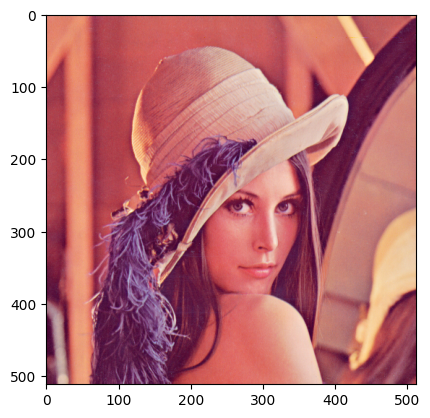

In [2]:
# Load image
image = cv2.imread('../../data/lenna_test_image.png')

# Convert BGR-space to RGB-space (OpenCV loads images in BGR-space)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image)
plt.show()

## Cropping

The original image is a matrix with dimensions: (512, 512, 3) and the resized image has dimensions: (100, 100, 3)


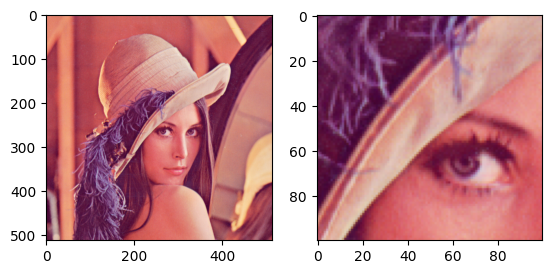

In [3]:
# Crop of the image
result = image[200:300, 200:300]

# Print the shape of both images
print("The original image is a matrix with dimensions: " + str(np.shape(image)) + ' and the resized image has dimensions: ' + str(np.shape(result)))

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Image resizing

The original image is a matrix with dimensions: (512, 512, 3) and the resized image has dimensions: (256, 256, 3)


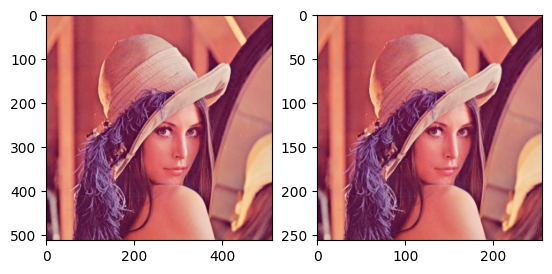

In [4]:
# Preserving the aspect ratio
scale_percent = 50

# Compute new image sizes
height = int(image.shape[0] * scale_percent/100)
width = int(image.shape[1] * scale_percent/100)
new_size = (width, height)

# Resizing the image
result = cv2.resize(image, new_size)

# Print the shape of both images
print("The original image is a matrix with dimensions: " + str(np.shape(image)) + ' and the resized image has dimensions: ' + str(np.shape(result)))

# Show images
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

## Image pyramids

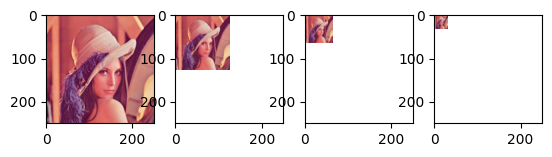

In [5]:
# Creating an image pyramid of 4 deep
deep = 4

# Make pyramids 
image_ = image.copy()
for i in range(deep):
    plt.subplot(1, deep, i + 1)
    image_ = cv2.pyrDown(image_)
    plt.axis([0, 250, 250, 0])
    plt.imshow(image_)
    
# Show images
plt.show()

## Image warping

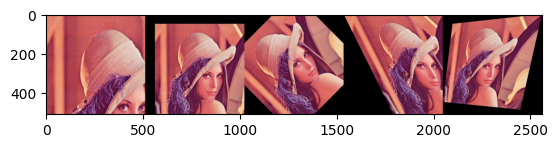

In [6]:
# Get image shape and center location
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# Scaling of 1.5 in x- and 1.8 in y-direction
M = np.float32([[1.5, 0  , 0], [0,   1.8, 0], [0,   0,   1]])
result = cv2.warpPerspective(image, M, (w, h))

# Translation of 50 pixels in x- and 50 pixels in y-direction
M = np.float32([[1, 0, 50], [0, 1, 50], [0, 0, 1]])
result1 = cv2.warpPerspective(image, M, (w, h))

# Rotation of 45 degrees
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
result2 = cv2.warpAffine(image, M, (w, h))

# Shearing of 0.5 in x-direction
M = np.float32([[1, 0.5, 0], [0, 1  , 0], [0, 0  , 1]])
result3 = cv2.warpPerspective(image, M, (w, h))

# Define pts1 (points on original image) and pts2 (points where the original points should lie)
pts1 = np.float32([[0, 0], [0, 512], [512, 512], [512, 0]])
pts2 = np.float32([[50, 50], [0, 450], [400, 490], [512, 0]])
     
# Compute corresponding transformationn matrix in 3D and apply transform
M = cv2.getPerspectiveTransform(pts1, pts2)
result4 = cv2.warpPerspective(image, M, (w, h))

# Concatenate results
result = np.concatenate((result, result1, result2, result3, result4), axis=1)

# Shiow images
plt.imshow(result)
plt.show()